## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Imports

In [41]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 

In [42]:
def chebyshev_iteration_method(A, B, x0, iter_num, l_max, l_min):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    x = x0
    r = B - np.matmul(A, x)

    for i in range(1, iter_num + 1):
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif i == 2:
            beta = 0.5 * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = B - r
        if norm(r) < 1e-10:
            return x, i
    return x, iter_num

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie.

#### Rozwiązanie

Równanie Poissona ma postać: $$\nabla^{2}\varphi(x,y) = - \rho(x,y)$$
gdzie

$\nabla^{2}$ - operator Laplace'a,

$\rho(x,y)$ - funkcja rozakładu żródeł

To równanie może być zapisane w sposób: $$\frac{\partial^{2}\varphi(x,y)}{\partial x^{2}} + \frac{\partial^{2}\varphi(x,y)}{\partial y^{2}} = -\rho(x,y)$$

Warunki brzegowe Dirichleta:

$\varphi(0,y) = 0$

$\varphi(n+1,y) = 0$

$\varphi(x,0) = 0$

$\varphi(x,n+1) = 0$

Za pomocą metody różnic skończonych wyliczamy przybliżenie pochodnych

Została wyprowadzona siatka o wymiarach [10, 10]

$\varphi_{i, j} = \varphi(x_{i}, y_{j}), i = 1,...10, j = 1,...10$

Obliczamy pochodne

$\frac{\partial \varphi_{i,j}}{\partial x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$

$\frac{\partial^{2} \varphi_{i,j}}{\partial x^{2}} = \frac{\varphi_{i+1,j}-2 \varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$

$\frac{\partial \varphi_{i,j}}{\partial y} = \frac{\varphi_{i,j+1}-\varphi_{i, j-1}}{2h} + O(h^{2})$

$\frac{\partial^{2} \varphi_{i,j}}{\partial y^{2}} = \frac{\varphi_{i,j+1}-2 \varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$

Na koniec podstawiamy równania do równania wyjściowego i po skróceniu otrzymujemy


$\frac{\varphi(x_{i}, y_{j - 1}) + \varphi(x_{i - 1}, y_{j}) - 4\varphi(x_{i}, y_{j}) + \varphi(x_{i + 1}, y_{j}) + \varphi(x_{i}, y_{j + 1})}{h^{2}} = - \rho(x, y)$

Dla każego z punktów  $(x_{i}, y_{j})$ równanie jest zależne od czterech punktów oddalonych o h: $(x_{i+1}, y_{j})$, $(x_{i-1}, y_{j})$, $(x_{i}, y_{j+1})$, $(x_{i}, y_{j-1})$

Matrix A
[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]
Vecotr B
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5  6.   6.5  7.   7.5
  8.   8.

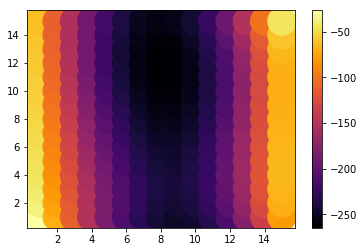

In [59]:
def get_matrix_A(n):
    A = np.zeros((n**2, n**2))
    for i in range(n**2):
        A[i][i] = -4
        if i - 1 >= 0: 
            A[i-1][i] = 1.0
        if i + 1 < n**2: 
            A[i+1][i] = 1.0
        if i - n >= 0: 
            A[i-n][i] = 1.0
        if i + n < n**2: 
            A[i+n][i] = 1.0
    return A

def get_vector_B(n):
    B = np.zeros(n ** 2)
    k = 0
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            B[k] = (lambda x, y: (x + y) / float(2))(j, i)
            k += 1
    return B

def show_graphic(n, result):
    x_arr = []
    y_arr = []
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            x_arr.append(i)
            y_arr.append(j)

    plt.scatter(x_arr, y_arr, c = res, sizes=[800] * 100, alpha=1, cmap='inferno', marker="o")
    plt.colorbar()
    plt.show()

A = get_matrix_A(15)
B = get_vector_B(15)

print("Matrix A")
print(A)

print("Vecotr B")
print(B)

result, iter_num = chebyshev_iteration_method(A, B, np.zeros(len(B)), 1000, 0, 2)

print("Liczba iteracji:", iter_num)
print("Chebyshev iteration method:")
print(res)

show_graphic(15, result)

#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 

In [62]:
def gaussa_seidla_method(A, B, N):
    x = np.zeros(len(A[0]))
    
    for i in range(N):
        new_x = np.zeros(len(A[0]))
        for j in range(A.shape[0]):
            s1 = np.dot(A[j, :j], new_x[:j])
            s2 = np.dot(A[j, j + 1:], x[j + 1:])
            new_x[j] = (B[j] - s1 - s2) / A[j, j]
        if np.linalg.norm(new_x - x) < 1e-10:
            return new_x, i
        x = new_x
    return x, N

def sor_method(A, B, omega, N):
    x = np.zeros(len(A[0]))
    new_x = np.zeros(len(A[0]))

    for i in range(N):
        for j in range (B.shape[0]):
            x[j] = (B[j] - (np.dot(A[j, j + 1:], new_x[j + 1:]) + 
                            np.dot(A[j, :j], x[:j]))) / A[j, j]
            x[j] = np.dot(x[j], omega) + np.dot(new_x[j], (1 - omega))

        if np.linalg.norm(np.dot(A, x) - B) < 1e-10:
            return new_x, j
        new_x = x
    return x, N

def compare_iterations(A, B):
    result1, iter_num1 = chebyshev_iteration_method(A, B, np.zeros(len(B)), 1000, 0, 2)
    result2, iter_num2 = gaussa_seidla_method(A, B, 1000)
    result3, iter_num3 = sor_method(A, B, 0.5, 1000)
    
    print("Chebyshev iterations number:", iter_num1)
    print(result1)
    print()
    print("Gaussa-Seidla iterations number:", iter_num2)
    print(result2)
    print()
    print("SOR iterations number:", iter_num3)
    print(result3)
    
compare_iterations(A, B)

('Chebyshev iterations number:', 1)
[ -26.61104622  -35.95305968  -40.16204895  -42.75286482  -44.82474935
  -46.73635377  -48.59631461  -50.42053288  -52.18788635  -53.86307649
  -55.41042018  -56.81249972  -58.11692019  -59.5824609   -62.18372321
  -69.49112521  -75.53914355  -79.9422713   -83.52466098  -86.8097788
  -90.02435113  -93.2283718   -96.39793055  -99.46793602 -102.35399943
 -104.96610451 -107.22265852 -109.07272014 -110.52920019 -111.66130674
 -112.13058784 -114.77011801 -118.04323174 -121.593729   -125.36535375
 -129.32290013 -133.39489092 -137.47488151 -141.43192776 -145.11888068
 -148.3773399  -151.03930969 -152.92210166 -153.800313   -153.30171572
 -150.5998014  -150.8675089  -152.86680864 -155.94166952 -159.73500706
 -164.00700472 -168.55341023 -173.17477682 -177.66601284 -181.81225564
 -185.38506473 -188.1351387  -189.77606381 -189.94823441 -188.14544175
 -183.59939315 -182.23330755 -183.11482441 -185.57113339 -189.12600026
 -193.41670145 -198.13696848 -203.00480267